In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from studentsperformance',con=engine)

In [11]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
df.info()
# Wow already pretty clean looking!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [13]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [15]:
df.groupby('gender').mean()

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [41]:
df.groupby('race/ethnicity').mean()

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


In [42]:
df.groupby('parental level of education').mean()

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


In [17]:
stats.ttest_ind(df['math score'][df.gender == 'female'], df['math score'][df.gender == 'male'])

Ttest_indResult(statistic=-5.383245869828983, pvalue=9.120185549328822e-08)

In [40]:
for var in ['gender', 'race/ethnicity', 'parental level of education']:
    for score in ['math score', 'reading score', 'writing score']:
        for i in range(len(df[var].unique()) - 1):
            print('t-test between ' + str(df[var].unique()[i]) + ' and ' + str(df[var].unique()[i +1]) + ' for '+ score)
            print(stats.ttest_ind(df[score][df[var] == df[var].unique()[i]], df[score][df[var] == df[var].unique()[i + 1]]))
            print('\n')

t-test between female and male for math score
Ttest_indResult(statistic=-5.383245869828983, pvalue=9.120185549328822e-08)


t-test between female and male for reading score
Ttest_indResult(statistic=7.959308005187657, pvalue=4.680538743933289e-15)


t-test between female and male for writing score
Ttest_indResult(statistic=9.979557910004507, pvalue=2.019877706867934e-22)


t-test between group B and group C for math score
Ttest_indResult(statistic=-0.7315669893534263, pvalue=0.4647708939167453)


t-test between group C and group A for math score
Ttest_indResult(statistic=1.5997220303217299, pvalue=0.11043810745588042)


t-test between group A and group D for math score
Ttest_indResult(statistic=-3.3466982429712298, pvalue=0.0009068636053543751)


t-test between group D and group E for math score
Ttest_indResult(statistic=-4.282287214674715, pvalue=2.3187640326715042e-05)


t-test between group B and group C for reading score
Ttest_indResult(statistic=-1.3223156212901772, pvalue=0.18665

In [ ]:
# Yes there are differences between genders and exam scores and it is statistically significant.
# Some of the ethnicity groups were significant and some were not.
# Some of the differences in parental level of educaiton were significant and some were not.

In [44]:
df.groupby('lunch').mean()

,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


In [46]:
print(stats.ttest_ind(df['math score'][df.lunch == 'free/reduced'], df['math score'][df.lunch == 'standard']))
print(stats.ttest_ind(df['reading score'][df.lunch == 'free/reduced'], df['math score'][df.lunch == 'standard']))
print(stats.ttest_ind(df['writing score'][df.lunch == 'free/reduced'], df['math score'][df.lunch == 'standard']))

Ttest_indResult(statistic=-11.837180472914612, pvalue=2.4131955993137074e-30)
Ttest_indResult(statistic=-5.771705296941809, pvalue=1.0468192022800128e-08)
Ttest_indResult(statistic=-7.414104455424897, pvalue=2.609955931767291e-13)


In [47]:
# Yes there is a significant difference of test scores between lunch groups. Free/reduced lunch kids are more
# likely to have lower levels of parental education or be able to pay for a test preparation course, or
# belong to ethnicity groups that have faced more adversity, or just generally have faced more adversity due to income

In [50]:
df.groupby('test preparation course').mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


In [53]:
print(stats.ttest_ind(df['math score'][df['test preparation course'] == 'none'], df['math score'][df['test preparation course'] == 'completed']))
print(stats.ttest_ind(df['reading score'][df['test preparation course'] == 'none'], df['math score'][df['test preparation course'] == 'completed']))
print(stats.ttest_ind(df['writing score'][df['test preparation course'] == 'none'], df['math score'][df['test preparation course'] == 'completed']))

Ttest_indResult(statistic=-5.704616417349102, pvalue=1.5359134607147415e-08)
Ttest_indResult(statistic=-3.315054707284506, pvalue=0.0009492374433654685)
Ttest_indResult(statistic=-5.315973247925237, pvalue=1.3089499385741896e-07)


In [54]:
# yes students that completed the test preparation course have significantly higher test scores.

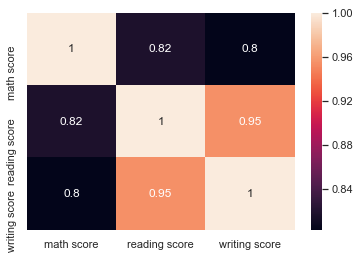

In [56]:
sns.heatmap(df.corr(), annot=True)